In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/var/folders/7k/txk4_y4x25v6wpcbflw64yw40000gn/T/ipykernel_39583/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df=pd.read_csv('Boston.csv',header=0)
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [6]:
df.shape

(506, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [14]:
corr_matrix=df.corr()

In [15]:
corr_matrix["MEDV"].sort_values(ascending=False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

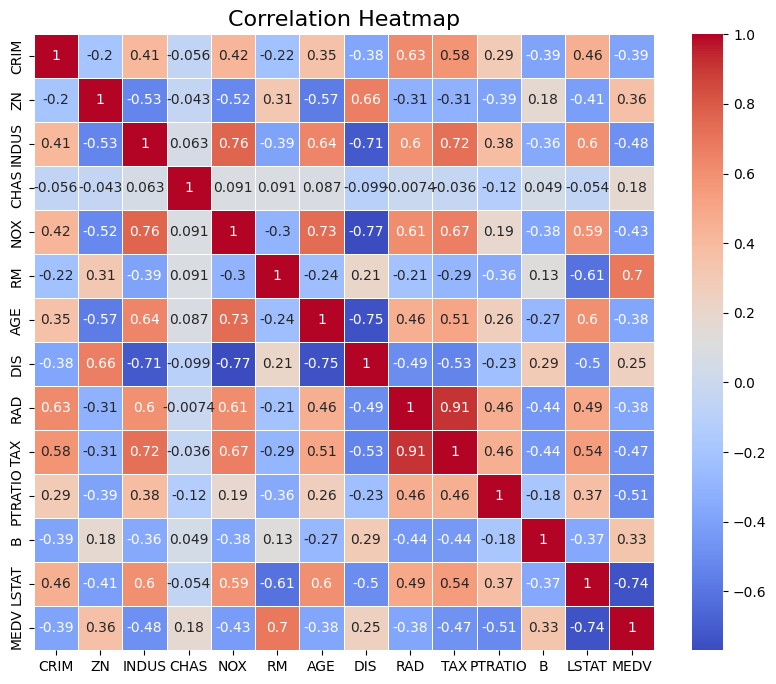

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


corr_matrix = df.corr() 

plt.figure(figsize=(10, 8))  


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)


plt.title('Correlation Heatmap', fontsize=16)


plt.show()


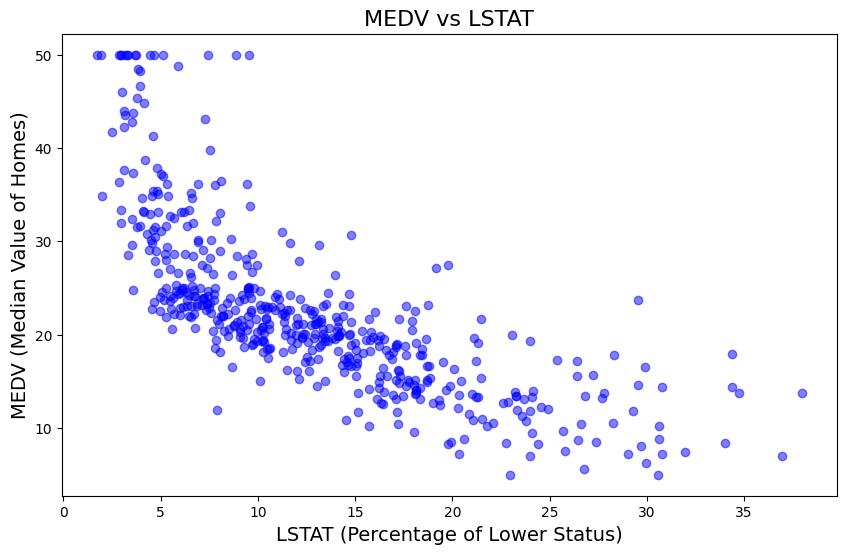

In [20]:
plt.figure(figsize=(10, 6))


plt.scatter(df['LSTAT'], df['MEDV'], color='blue', alpha=0.5)


plt.title('MEDV vs LSTAT', fontsize=16)
plt.xlabel('LSTAT (Percentage of Lower Status)', fontsize=14)
plt.ylabel('MEDV (Median Value of Homes)', fontsize=14)


plt.show()


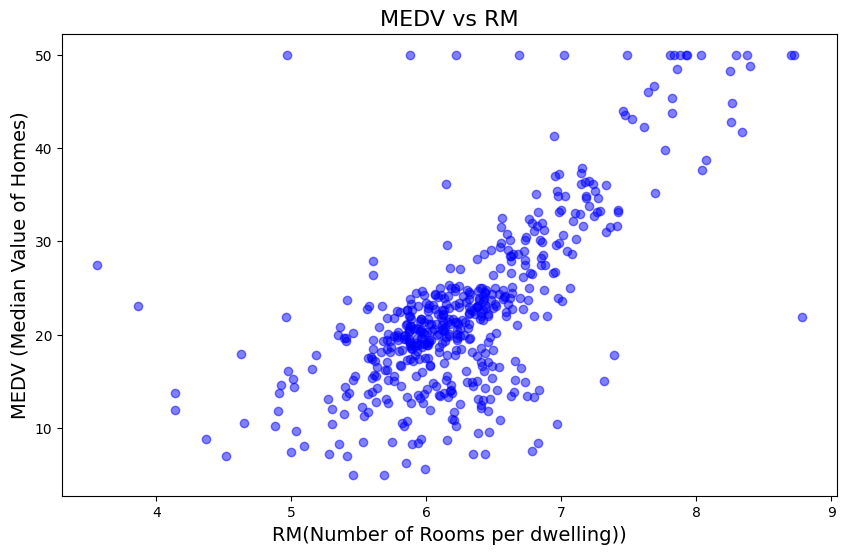

In [21]:
plt.figure(figsize=(10, 6))


plt.scatter(df['RM'], df['MEDV'], color='blue', alpha=0.5)


plt.title('MEDV vs RM', fontsize=16)
plt.xlabel('RM(Number of Rooms per dwelling))', fontsize=14)
plt.ylabel('MEDV (Median Value of Homes)', fontsize=14)


plt.show()

In [7]:
y=df['MEDV']
X=df.drop('MEDV', axis=1).copy()

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [22]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [24]:
y_pred=lin_reg.predict(X_test)

In [25]:
from sklearn.metrics import mean_squared_error
import numpy as np
lin_mse = mean_squared_error(y_test, y_pred)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

5.041150727770651

In [26]:
from sklearn.tree import DecisionTreeRegressor
tree=DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [27]:
y_pred_tree=tree.predict(X_test)
lin_mse_tree = mean_squared_error(y_test, y_pred_tree)
lin_rmse_tree = np.sqrt(lin_mse_tree)
lin_rmse_tree

4.368649452544308

In [28]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(lin_reg,X_train,y_train, scoring='neg_mean_squared_error', cv=10)
linreg_rmse_scores = np.sqrt(-scores)
linreg_rmse_scores

array([5.17120343, 4.13295948, 4.70249738, 3.46703664, 5.99007827,
       4.13720009, 6.23011313, 3.8872403 , 4.68876286, 4.90634173])

In [29]:
scores=cross_val_score(tree,X_train,y_train, scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([3.5960344 , 3.82581093, 4.45464953, 3.07971332, 4.85914087,
       4.07743792, 6.11076918, 4.59352806, 3.80805068, 3.73349702])